In [2]:
## to generate comprehensive symptom vocabularies and identify symptom information in EHR notes


## Text Data Analysis 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import string 
from wordcloud import WordCloud

In [2]:
! pip install matplotlib 

In [ ]:
! pip install seaborn 

In [ ]:
! pip install wordcloud 

In [3]:
df = pd.read_csv('patient_notes.csv')

In [4]:
df.head(10)

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...
5,5,0,"17 yo m, presenting with palpitations/increase..."
6,6,0,17 yo male presents with 3-4 month history of ...
7,7,0,17 yo male presents with a 2-3 month history o...
8,8,0,HPI: 17 YO complains of intermittent heart pal...
9,9,0,Mr. Cleveland is a 17 yo M who presents to cli...


In [5]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0, inplace=True)
print(df.shape)

(42146, 3)
False
(42146, 3)


In [6]:
# checking for null values if any 
# no null values
df.isnull().sum()

pn_num        0
case_num      0
pn_history    0
dtype: int64

In [7]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

In [8]:
# View duplicate rows
# No duplicate rows 
print(duplicates)

Empty DataFrame
Columns: [pn_num, case_num, pn_history]
Index: []


In [9]:
# getting basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42146 entries, 0 to 42145
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pn_num      42146 non-null  int64 
 1   case_num    42146 non-null  int64 
 2   pn_history  42146 non-null  object
dtypes: int64(2), object(1)
memory usage: 987.9+ KB


In [10]:
# initializing a new dataframe with only the pn_history column 

pn_history_df = df['pn_history']
pn_history_df = pn_history_df.to_frame()

pn_history_df.sample(10, random_state=5)

,pn_history
28251,Mr. Smith's mother has given verbal consent fo...
36804,Mrs. Wicks is a 67 yo woman who has been havin...
13121,Mr. Hamilton notes 2 months of epigastric stom...
3153,HPI : 44 yo f presents with irregual periods f...
13237,cc: 35 yr old M comes in with stomach pain\r\n...
8766,The patient is a 35 year old male with a 2 mon...
13238,Chad Hamilton is a 35 y/o M presenting with bu...
2104,17 yo male college student w/ 3-4 months of in...
20412,Ms Whelan is a 26yo F who comes for follow-up ...
25731,Pt is 26 yo female with palpitations. Heart po...


<Axes: xlabel='pn_history length', ylabel='Number of patient history'>

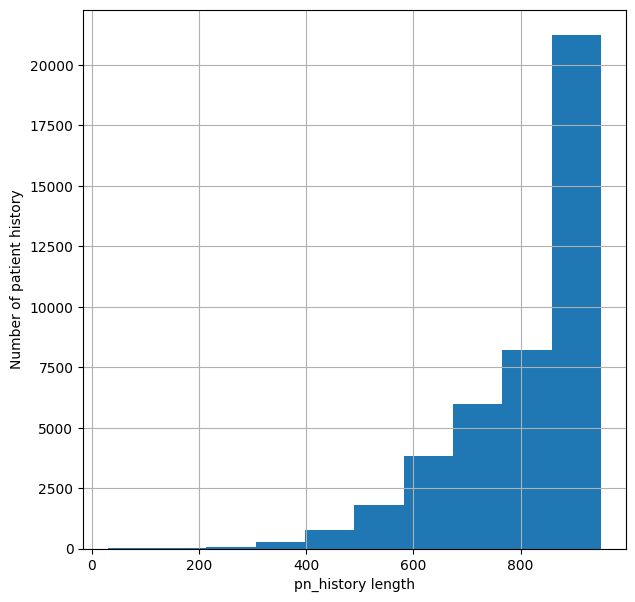

In [11]:
# visualizing pn_history length

plt.figure(figsize=(7,7))
plt.xlabel('pn_history length')
plt.ylabel("Number of patient history")

pn_history_df['pn_history'].str.len().hist()

## Part of Speech Tagging 

In [12]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
# Contraction Mapping 

#! pip install contractions 
import contractions 

In [ ]:
#pn_history_df['pn_history']=pn_history_df['pn_history'].apply(lambda x: [contractions.fix(word) for word in x.split()])
#pn_history_df.sample(10, random_state=5)

In [14]:
# Convert the strings back to lists of words for each row
pn_history_df['pn_history'] = pn_history_df['pn_history'].apply(lambda x: x.split())
pn_history_df.sample(10, random_state=5)

,pn_history
28251,"[Mr., Smith's, mother, has, given, verbal, con..."
36804,"[Mrs., Wicks, is, a, 67, yo, woman, who, has, ..."
13121,"[Mr., Hamilton, notes, 2, months, of, epigastr..."
3153,"[HPI, :, 44, yo, f, presents, with, irregual, ..."
13237,"[cc:, 35, yr, old, M, comes, in, with, stomach..."
8766,"[The, patient, is, a, 35, year, old, male, wit..."
13238,"[Chad, Hamilton, is, a, 35, y/o, M, presenting..."
2104,"[17, yo, male, college, student, w/, 3-4, mont..."
20412,"[Ms, Whelan, is, a, 26yo, F, who, comes, for, ..."
25731,"[Pt, is, 26, yo, female, with, palpitations., ..."


In [15]:
# joining back the list of items into one string

#pn_history_df['pn_history']=[''.join(map(str,l)) for l in pn_history_df['pn_history']]
#pn_history_df.sample(10, random_state=5) 

In [16]:
# Convert the list of words back to a single string for each row
pn_history_df['pn_history'] = pn_history_df['pn_history'].apply(lambda x: ' '.join(x))
pn_history_df.sample(10, random_state=5) 

,pn_history
28251,Mr. Smith's mother has given verbal consent fo...
36804,Mrs. Wicks is a 67 yo woman who has been havin...
13121,Mr. Hamilton notes 2 months of epigastric stom...
3153,HPI : 44 yo f presents with irregual periods f...
13237,cc: 35 yr old M comes in with stomach pain HPI...
8766,The patient is a 35 year old male with a 2 mon...
13238,Chad Hamilton is a 35 y/o M presenting with bu...
2104,17 yo male college student w/ 3-4 months of in...
20412,Ms Whelan is a 26yo F who comes for follow-up ...
25731,Pt is 26 yo female with palpitations. Heart po...


In [17]:
# exploring individual row 
print(pn_history_df['pn_history'][0])
print(type(pn_history_df['pn_history'][0]))

17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment -began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav -associated with dispnea on exersion and rest,stressed out about school -reports fe feels like his heart is jumping out of his chest -ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam -pmh:non,meds :aderol (from a friend),nkda -fh:father had MI recently,mother has thyroid dz -sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school -sh:no std
<class 'str'>


In [18]:
pn_history_df.head(5)

,pn_history
0,"17-year-old male, has come to the student heal..."
1,17 yo male with recurrent palpitations for the...
2,Dillon Cleveland is a 17 y.o. male patient wit...
3,a 17 yo m c/o palpitation started 3 mos ago; N...
4,17yo male with no pmh here for evaluation of p...


In [19]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re 
pn_history_df['pn_history']=pn_history_df['pn_history'].str.lower()
pn_history_df['pn_history']=pn_history_df['pn_history'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))  # it removes any characters that are not letters, digits, spaces, or single quotes
pn_history_df.sample(10, random_state=5)



,pn_history
28251,mr smith's mother has given verbal consent for...
36804,mrs wicks is a 67 yo woman who has been having...
13121,mr hamilton notes 2 months of epigastric stoma...
3153,hpi 44 yo f presents with irregual periods fo...
13237,cc 35 yr old m comes in with stomach pain hpi ...
8766,the patient is a 35 year old male with a 2 mon...
13238,chad hamilton is a 35 yo m presenting with bur...
2104,17 yo male college student w 34 months of inte...
20412,ms whelan is a 26yo f who comes for followup a...
25731,pt is 26 yo female with palpitations heart pou...


In [20]:
print(pn_history_df['pn_history'][0])

17yearold male has come to the student health clinic complaining of heart pounding mr cleveland's mother has given verbal consent for a history physical examination and treatment began 23 months agosuddenintermittent for 2 dayslasting 34 minworseningnonallevaggrav associated with dispnea on exersion and reststressed out about school reports fe feels like his heart is jumping out of his chest rosdenies chest paindyaphoresiswt losschillsfevernauseavomitingpedal edeam pmhnonmeds aderol from a friendnkda fhfather had mi recentlymother has thyroid dz shnonsmokermariguana 56 months ago3 beers on the weekend basketball at school shno std


In [21]:
# removing html tags from the patient_history columns if there are any

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [22]:
text ="<html><body><p> Movie 1 </p><p> Actor - Amir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [23]:
remove_html_tags(text)

' Movie 1  Actor - Amir Khan Click here to download'

In [24]:
pn_history_df['pn_history']=pn_history_df['pn_history'].apply(remove_html_tags)

In [25]:
print(pn_history_df['pn_history'][2])

dillon cleveland is a 17 yo male patient with no significant pmh who presents with complaints of heart pounding this has been going on for a few months and happens once or twice a month he cannot think of any triggers and it has occurred both with activity and at rest occasionally it is accompanied by chest pressure but not pain that is located at the center of his chest on one instance he experienced chest pressure lightheadedness and shortness of breath for 10 minutes with the heart pounding otherwise he has not had shortness of breath chest pain anxiety medication adderall twice a week as study aid not prescribed fh mother  thyroid disease father  heart attack at age 52 both living sh no smoking 34 drinks on the weekend per sitting marijuanna once recently no other recreational drugs


In [26]:
# removing urls from the patient_history columns if there are any


def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [27]:
text1 = 'Check out my notebook https://www.kaggle.com'


In [28]:
remove_url(text1)

'Check out my notebook '

In [29]:
pn_history_df['pn_history']=pn_history_df['pn_history'].apply(remove_url)

In [30]:
print(pn_history_df['pn_history'][2])

dillon cleveland is a 17 yo male patient with no significant pmh who presents with complaints of heart pounding this has been going on for a few months and happens once or twice a month he cannot think of any triggers and it has occurred both with activity and at rest occasionally it is accompanied by chest pressure but not pain that is located at the center of his chest on one instance he experienced chest pressure lightheadedness and shortness of breath for 10 minutes with the heart pounding otherwise he has not had shortness of breath chest pain anxiety medication adderall twice a week as study aid not prescribed fh mother  thyroid disease father  heart attack at age 52 both living sh no smoking 34 drinks on the weekend per sitting marijuanna once recently no other recreational drugs


In [31]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
exclude = string.punctuation

In [33]:
# removing punctuations if there are any 

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [34]:
pn_history_df['pn_history']=pn_history_df['pn_history'].apply(remove_punc)

In [35]:
print(pn_history_df['pn_history'][8])

hpi 17 yo complains of intermittent heart palpitations x 23 months it has ocurred 56 times in total with no precipitant events although it happened at a basketball game once he also had associated sob 2 days ago he denies any cough swelling loc no dizziness no pain no changes in bowel habits no abnormal sweating no heat or cold intolerance no weight changes no fever no mood changes not stressed or anxious recently ros negative except as above pmh none psh none allergies nkda medications adderol fh dad had an mi at 52 yo mom has a thyroid problem sh college freshman non smoker etoh on weekends with friends marihuana once plays basketball and runs sexual history sexually active with girlfriend uses condoms for contraception no stds


In [36]:
short_words_desc =   { 
                    'ALL':'acute lymphoblastic leukemia',
                    'AMI': 'acute myocardial infarction ',
                    'B-ALL':'b-cell acute lymphoblastic leukemia',
                    'FSH': 'follicle stimulating hormone',
                    'HAPE': 'high altitude pulmonary edema',
                    'HPS': 'hantavirus pulmonary syndrome',
                    'IBS': 'irritable bowel syndrome',
                    'IDDM': 'insulin dependent diabetes mellitus',
                    'MDS': 'myelodysplastic syndrome',
                    'NBCCS': 'nevoid basal cell carcinoma syndrome',
                    'PE': 'pulmonary embolism',
                    'SIDS': 'sudden infant death syndrome',
                    'TSH': 'thyroid-stimulating hormone',
                    'a.c.': 'before meals',
                    'a/g ratio': 'albumin to globulin ratio',
                    'ACL': 'anterior cruciate ligament',
                    'Ad lib': 'at liberty',
                    'AFR': 'acute renal failure',
                    'ADHD': 'attention deficit hyperactivity disorder',
                    'ADR': 'adverse drug reaction',
                    'AIDS': 'acquired immune deficiency syndrome',
                    'AKA': 'above the knee amputation',
                    'Anuric': 'not producing urine',
                    'ANED': 'alive no evidence of disease',
                    'ADH': 'antidiuretic hormone',
                    'ARDS': 'acute respiratory distress syndrome',
                    'ARF': 'acute renal kidney failure',
                    'ASCVD': 'atherosclerotic cardiovascular disease',
                    'b.i.d.': 'twice daily',
                    'bld': 'blood',
                    'Bandemia': 'slang for an elevated level of band forms of white blood cells',
                    'Bibasilar': 'at the bases of both lungs',
                    'BKA': 'below the knee amputation',
                    'BMP': 'basic metabolic panel',
                    'BP': 'blood pressure',
                    'BPD': 'borderline personality disorder',
                    'BSO': 'bilateral salpingo-oophorectomy',
                    'C&S': 'culture and sensitivity',
                    'C/O': 'complaint of',
                    'cap': 'capsule',
                    'Ca': 'cancer',
                    'CABG':'coronary artery bypass graft',
                    'CBC': 'complete blood count',
                    'CC': 'chief complaint',
                    'CDE': 'complete dental oral evaluation',
                    'cc': 'cubic centimeters',
                    'Chem panel': 'chemistry panel',
                    'CPAP': 'continuous positive airway pressure',
                    'COPD': 'chronic obstructive pulmonary disease',
                    'CT': 'chemotherapy',
                    'CVA': 'cerebrovascular accident Stroke',
                    'D/C': 'discontinue or discharge',
                    'DC': 'discontinue or discharge',
                    'DCIS': 'ductal Carcinoma In Situ',
                    'DDX': 'differential diagnosis',
                    'DJD': 'degenerative joint disease',
                    'DM': 'diabetes mellitus',
                    'DNC' : 'dilation and curettage',
                    'D&C': 'dilation and curettage',
                    'D and C': 'dilation and curettage',
                    'DNR': 'do not resuscitate',
                    'DOE': 'dyspnea on exertion',
                    'DTR': 'deep tendon reflexes',
                    'DVT': 'deep venous thrombosis',
                    'ETOH': 'alcohol',
                    'ECT': 'electroconclusive therapy',
                    'FX': 'fracture',
                    'G' :'medical abbreviations',
                    'g':'gram',
                    'GOMER': 'slang for get out of my emergency room',
                    'GvHD': 'graft vs host disease',
                    'gtt': 'drops',
                    'H&H': 'hemoglobin and hematocrit',
                    'H&P': 'history and physical examination',
                    'h.s.': 'at bedtime',
                    'H/O': 'history of',
                    'h/o': 'history of',
                    'HA': 'headache',
                    'HRT': 'hormone replacement therapy',
                    'HTN': 'hypertension',
                    'I&D': 'incision and drainage',
                    'IBD': 'inflammatory bowel disease',
                    'ICD': 'implantable cardioverter defibrillator',
                    'ICU': 'intensive care unit',
                    'IM': 'intramuscular',
                    'IMP': 'impression',
                    'ITU': 'intensive therapy unit',
                    'in vitro': 'in the laboratory',
                    'in vivo': 'in the body',
                    'IPF': 'idiopathic pulmonary fibrosis',
                    'IU': 'international units',
                    'JT': 'joint',
                    'K': 'potassium',
                    'KCL': 'potassium chloride',
                    'LCIS': 'lobular carcinoma in situ',
                    'LBP': 'low back pain',
                    'LLQ': 'left lower quadrant',
                    'LUQ': 'left upper quadrant',
                    'Lytes': 'electrolytes',
                    'MCL': 'medial collateral ligament',
                    'mg': 'milligrams',
                    'M/H': 'medical history',
                    'ml': 'milliliters',
                    'MVP': 'mitral valve prolapse',
                    'N/V': 'nausea or vomiting',
                    'Na': 'sodium',
                    'NCP': 'nursing care plan',
                    'NPO': 'nothing by mouth',
                    'NSR': 'normal sinus rhythm of the heart',
                    'O&P': 'ova and parasites',
                    'O.D.': 'right eye',
                    'O.S.': 'left eye',
                    'O.U.': 'both eyes',
                    'ORIF': 'open reduction and internal fixation',
                    'P': 'pulse',
                    'p¯': 'after meals',
                    'p.o.': 'by mouth',
                    'p.r.n.': 'as needed',
                    'PCL': 'posterior cruciate ligament',
                    'PD': 'progressive disease',
                    'PERRLA': 'pupils equal round and reactive to light and accommodation',
                    'PFT': 'pulmonary function test',
                    'PERRLA':'pupils equal round and reactive to light and accommodation',
                    'Plt': 'platelets',
                    'PMI': 'point of the maximum impulse of the heart', 
                    'PMS': 'premenstrual syndrome',
                    'PT': 'physical therapy',
                    'PTH': 'parathyroid hormone',
                    'PTSD': 'post traumatic stress syndrome',
                    'PUD': 'peptic ulcer disease',
                    'q.d.': 'each day',
                    'q.i.d.': 'four times daily',
                    'q2h': 'every 2 hours',
                    'q3h': 'every 3 hours',
                    'qAM': 'each morning',
                    'qhs': 'at each bedtime',
                    'qod': 'every other day',
                    'qPM': 'each evening',
                    'RA': 'rheumatoid arthritis',
                    'RDS': 'respiratory distress syndrome',
                    'R/O': 'rule out',
                    'REB': 'rebound',
                    'RLQ': 'right lower quadrant',
                    'ROS': 'review of systems',
                    'RUQ': 'right upper quadrant',
                    's/p': 'status post',
                    'SAD': 'season affective disorder',
                    'SOB': 'shortness of breath',
                    'SQ': 'subcutaneous',
                    'T': 'temperature',
                    'T&A': 'tonsillectomy and adenoidectomy',  
                    't.i.d.': 'three times daily',
                    'tab': 'tablet',
                    'TAH': 'total abdominal hysterectomy',
                    'THR': 'total hip replacement',
                    'TKR': 'total knee replacement',
                    'TMJ': 'tempomandibular joint',
                    'UA' : 'urinalysis',
                    'u/a': 'urinalysis',
                    'U' : 'unit',
                    'u': 'unit',
                    'ULN': 'upper limits of normal',
                    'URI': 'upper respiratory infection',
                    'ut dict': 'as directed',
                    'UTI': 'urinary tract infection',
                    'VSS': 'vital signs are stable',
                    'Wt': 'weight',
                    'XRT': 'radiotherapy external',
                    'yo' : 'year',
                    'yr':'year',
                    'y':'year',
                    'y.o.':'year',
                    'y/o':'year old',
                    'Y/O':'year old',
                    'o':'old',
                    'mo': 'month',
                    'mon':'month',
                    'pmh':'past medical history',
                    'm':'male',
                    'm.':'male',
                    'mos': 'months',
                    'mins':'minutes',
                    'PSH':'past surgical history',
                    'psh':'past surgical history',
                    'PShx':'past surgical history',
                    'PSHx':'past surgical history',
                    'FHX':'family history',
                    'fhx':'family history',
                    'FH':'family history',
                    'fh':'family history',
                    'SHX':'social history',
                    'SHx':'social history',
                    'Hx':'history',
                    'hx':'history',
                    'SH':'social history',
                    'sx':'social history',
                    'sh':'social history',
                    'SSHx':'social and substance use history',
                    'ssh':'social and sex history',
                    'MI':'myocardial infarction',
                    'mi':'myocardial infarction',
                    'HPI':'history of present illness',
                    'hpi':'history of present illness',
                    'neg':'negative',
                    'CAGE':'have you ever felt you should cut down in your drinking? Have people Annoyed you by criticizing your drinking? Have you ever felt bad or guilty about your drinking? Have you ever had a drink first thing in the morning to steady your nerves or get rid of a hangover?',
                    'PMHx':'past medical history',
                    'PMH':'past patient history',
                    'pmh':'past medical history',
                    'Resp-':'respiration',
                    'SOB':'shortness of breath',
                    'sob':'shortness of breath',
                    'LoC':'loss of consciousness',
                    'LOC':'loss of consciousness',
                    'loc':'loss of consciousness',
                    'M':'male',
                    'N/V':'nausea and vomiting',
                    'n/v':'nausea and vomitting',
                    'n':'nausea',
                    'v':'vomitting',
                    'd':'diarrhea',
                    'abd':'abdomen',
                    'CC':'chief complaint',
                    'c/o':'complaints of',
                    'C/O':'complaints of',
                    '1-2x/month':'one to two times per month',
                    '1-2/months':'one to two times per month',
                    '3-4/week':'three to four times in a week',
                    '2/3 month':'two to three month',
                    '3-4 mins':'three to four minutes',
                    '2-3':'two to three',
                    '2/3':'two to three',
                    '3-4':'three to four',
                    '7-8':'seven to eight',
                    '4-5':'four to five',
                    '5-6':'five to six',
                    '1-2':'one to two times',
                    '2-6':'two to six',
                    '0/4':'zero out of four',
                    'wk':'week',
                    'pt':'patient',
                    'meds':'medications',
                    'Meds':'medications',
                    'MEDS':'medications',
                    'Soc':'social',
                    'SOC':'social',
                    'aggrav and allev by':'aggravated and alleviated by',
                    'assoc':'associated',
                    'w/':'with',
                    'w':'with',
                    'hosp':'hospitalizations',
                    'GF':'girlfriend',
                    'girlfied':'girlfriend',
                    'gf':'girlfriend',
                    'STD':'sexually transmitted disease',
                    'std':'sexually transmitted disease',
                    'HIV':'human immunodeficiency virus',
                    'Hx':'history',
                    'hx':'history',
                    'h':'history',
                    'sexua':'sexual',
                    'SexH':'sexual history',
                    'sxs':'symptoms',
                    'h/o':'history of',
                    'A/W':'associated with',
                    'Dx':'diagnosis',
                    'neg':'negative',
                    'neg.':'negative',
                    'sx':'symptom',
                    'sxs':'symptoms',
                    'ROS':'review of systems',
                    'ros':'review of systems',
                    'ha':'headache',
                    'LAD':' Lymphadenopathy',
                    'Psurg':'plastic surgery',
                    'surg':'surgery',
                    'punding':'pounding',
                    'nka':'no known allergies',
                    'nkda':'no known drug allergies',
                    'etoh':'alcohol',
                    'cva':'cerebrovascular accident',
                    'htn':'hypertension',
                    'dm':'diabetes mellitus',
                    'bm':'bowel movement',
                    'x':'time',
                    'si':'suicidal ideation',
                    'phq2':'patient health questionnaire 2',
                    '@':'at',
                    'wt':'weight',
                    'mr.':'mister',
                    'tob':'tobacco',
                    'occ':'ocassional',
                    'feq':'frequency',
                    'otc':'over the counter',
                    'd/t':'due to',
                    'ekg':'electrocardiogram',
                    'w/o':'without',
                    'git':'gastrointestinal tract',
                    '-ve':'negative',
                    'utd':'up to date',
                    'ivdu':'intravenous drug use',
                    'hr':'hour',
                    'adhd':'attention deficit/hyperactivity',
                    'ihd':'ischemic heart disease',
                    'thc':'tetrahydrocannabinol',
                    'cp':'chest pain',
                    'im':'intramural',
                    'fam':'family',
                    'cig':'cigarette',
                    'ali':'allergies',
                    'stds':'sexually transmitted disease',
                    'ocp':'oral contraceptive pill',
                    'sti':'sexually transmitted infection ',
                    'mont':'month',
                    'mh':'mental health',
                    'adalar':'Adderall',
                    'wk':'week',
                    'allx':'allergies'
                    
}


In [37]:
short_words_desc

{'ALL': 'acute lymphoblastic leukemia',
 'AMI': 'acute myocardial infarction ',
 'B-ALL': 'b-cell acute lymphoblastic leukemia',
 'FSH': 'follicle stimulating hormone',
 'HAPE': 'high altitude pulmonary edema',
 'HPS': 'hantavirus pulmonary syndrome',
 'IBS': 'irritable bowel syndrome',
 'IDDM': 'insulin dependent diabetes mellitus',
 'MDS': 'myelodysplastic syndrome',
 'NBCCS': 'nevoid basal cell carcinoma syndrome',
 'PE': 'pulmonary embolism',
 'SIDS': 'sudden infant death syndrome',
 'TSH': 'thyroid-stimulating hormone',
 'a.c.': 'before meals',
 'a/g ratio': 'albumin to globulin ratio',
 'ACL': 'anterior cruciate ligament',
 'Ad lib': 'at liberty',
 'AFR': 'acute renal failure',
 'ADHD': 'attention deficit hyperactivity disorder',
 'ADR': 'adverse drug reaction',
 'AIDS': 'acquired immune deficiency syndrome',
 'AKA': 'above the knee amputation',
 'Anuric': 'not producing urine',
 'ANED': 'alive no evidence of disease',
 'ADH': 'antidiuretic hormone',
 'ARDS': 'acute respiratory d

In [38]:
# converted the key and value into lower case
lowercase_dict = {key.lower(): value for key, value in short_words_desc.items() }

In [39]:
lowercase_dict

{'all': 'acute lymphoblastic leukemia',
 'ami': 'acute myocardial infarction ',
 'b-all': 'b-cell acute lymphoblastic leukemia',
 'fsh': 'follicle stimulating hormone',
 'hape': 'high altitude pulmonary edema',
 'hps': 'hantavirus pulmonary syndrome',
 'ibs': 'irritable bowel syndrome',
 'iddm': 'insulin dependent diabetes mellitus',
 'mds': 'myelodysplastic syndrome',
 'nbccs': 'nevoid basal cell carcinoma syndrome',
 'pe': 'pulmonary embolism',
 'sids': 'sudden infant death syndrome',
 'tsh': 'thyroid-stimulating hormone',
 'a.c.': 'before meals',
 'a/g ratio': 'albumin to globulin ratio',
 'acl': 'anterior cruciate ligament',
 'ad lib': 'at liberty',
 'afr': 'acute renal failure',
 'adhd': 'attention deficit/hyperactivity',
 'adr': 'adverse drug reaction',
 'aids': 'acquired immune deficiency syndrome',
 'aka': 'above the knee amputation',
 'anuric': 'not producing urine',
 'aned': 'alive no evidence of disease',
 'adh': 'antidiuretic hormone',
 'ards': 'acute respiratory distress s

In [40]:
print(lowercase_dict)

{'all': 'acute lymphoblastic leukemia', 'ami': 'acute myocardial infarction ', 'b-all': 'b-cell acute lymphoblastic leukemia', 'fsh': 'follicle stimulating hormone', 'hape': 'high altitude pulmonary edema', 'hps': 'hantavirus pulmonary syndrome', 'ibs': 'irritable bowel syndrome', 'iddm': 'insulin dependent diabetes mellitus', 'mds': 'myelodysplastic syndrome', 'nbccs': 'nevoid basal cell carcinoma syndrome', 'pe': 'pulmonary embolism', 'sids': 'sudden infant death syndrome', 'tsh': 'thyroid-stimulating hormone', 'a.c.': 'before meals', 'a/g ratio': 'albumin to globulin ratio', 'acl': 'anterior cruciate ligament', 'ad lib': 'at liberty', 'afr': 'acute renal failure', 'adhd': 'attention deficit/hyperactivity', 'adr': 'adverse drug reaction', 'aids': 'acquired immune deficiency syndrome', 'aka': 'above the knee amputation', 'anuric': 'not producing urine', 'aned': 'alive no evidence of disease', 'adh': 'antidiuretic hormone', 'ards': 'acute respiratory distress syndrome', 'arf': 'acute r

In [41]:
import re

def replace_shortforms(sentence, dictionary):
    # Split the sentence into words
    words = sentence.split()
    
    # Replace short form words with their values from the dictionary
    replaced_words = []
    for word in words:
        # Remove non-alphanumeric characters to ensure matching
        clean_word = re.sub(r'[^a-zA-Z0-9]', '', word)
        
        # Perform a case-insensitive lookup in the dictionary
        replacement = dictionary.get(clean_word.lower(), word)
        
        replaced_words.append(replacement)
    
    # Join the replaced words back into a sentence
    replaced_sentence = ' '.join(replaced_words)
    
    return replaced_sentence

# Your dictionary
shortform_dict = {
    'all': 'acute lymphoblastic leukemia',
    'ami': 'acute myocardial infarction',
    'b-all': 'b-cell acute lymphoblastic leukemia'
}

# Example usage
input_sentence = "I had an ami, and it was scary."
output_sentence = replace_shortforms(input_sentence, shortform_dict)

print(output_sentence)


I had an acute myocardial infarction and it was scary.


In [42]:
# applying above function to our dataframe
pn_history_df['pn_history']=pn_history_df['pn_history'].apply(replace_shortforms, dictionary=lowercase_dict)

In [43]:
print(pn_history_df['pn_history'][10:21])

10    mr cleveland is a 17 year old male with no sig...
11    dillon cleveland is a 17 year old male with no...
12    patient is a 17 year male presenting to studen...
13    17 year old boy complaining of heart pounding ...
14    17 year old male with no significant past pati...
15    mr cleveland is a 17 year male who presents to...
16    history of present illness 17yo male presents ...
17    17 year male presents with 23 months of poundi...
18    history of present illness mr cleveland is a 1...
19    17yo male presents with heart palpitations he ...
20    17 year male presents with 34 months of interm...
Name: pn_history, dtype: object


In [44]:
print(pn_history_df['pn_history'][11])

dillon cleveland is a 17 year old male with no signfiicant past medical history presenting today with heart pounding for the past 23 months he first noticed an episode when he was sitting down and has had 56 over the past 3 months in the most recent episode has felt light headed and had to sit down while playing basketball there does not appear to be any precipating factors for there episodes and has never lost consciousness with them he has not had any changes in his bowel habits or sleep no sensitivity to heat or cold no weight gain or loss medical history none surgical history none medications adderal nonprescription allergies no known allergies family history father had myocardial infarction 1 year ago no history of arrythmias mother has a thyroid issue socno alcohol or tobacco tried marijuana once drinks one cup of coffee daily takes 2x adderal per week for the previous 8 months


In [45]:
! pip install textblob 
from textblob import TextBlob 

In [46]:
print(pn_history_df['pn_history'][10])

mr cleveland is a 17 year old male with no significant past patient history who presents with a two month history of palpitations the patient reports that began experiencing palpitationsheart racing about two months ago it is intermittent and does not have a clear cause no denies any chest pain or diaphoresis it happened most recently two days ago and was associated with shortness of breath the dysnpea and palpitations resolved with stopping the activity he denies any changes in vision or loss of consciousness he reports that he has been taking adderall for about a year from his friend multiple times a week he also drinks 34 cups of caffeine and energy drinks during the week he denies any weight changes pmhpsh none medications adderall family history hyperthyroidism in mother and father recently had a heart attack social history college student drins 34 beers on the week denies illicit or tobacco use


In [47]:
# correcting incorrect spellings from the sentences 

# In my case correcting spellings is not that much useful to us. 

incorrect_text = '''mr cleveland is a 17 year old male with no significant past patienst history who presents with a two month
 history of palpitationse the patient reports that began experiencing palpitationsheart raacing about two months ago it is
intermittent and does not have a clear cause no denies any chest pain or diaphoresis it happened most receently two days ago 
and was associated with shortness of breath the dysnpea and palpitations resolved with stopping the activity he denies any 
changes in vision or loss of consciousness he reports that he has been taking adderall for about a year from his friend 
multiple times a week he also drinks 34 cups of caffeine and energy drinks during the week he denies any weight changes 
pmhpsh none medications adderall family history hyperthyroidism in mother and father recently had a heart attack social history 
college student drins 34 beers on the week denies illicit or tobacco use
 '''

textBlb = TextBlob(incorrect_text)

textBlb.correct().string 


'mr cleveland is a 17 year old male with no significant past patient history who presents with a two month\n history of palpitationse the patient reports that began experiencing palpitationsheart racing about two months ago it is\nintermittent and does not have a clear cause no denied any chest pain or diaphoresis it happened most recently two days ago \nand was associated with shortness of breath the dyspnoea and palpitating resolved with stopping the activity he denied any \nchanges in vision or loss of consciousness he reports that he has been taking adderall for about a year from his friend \nmultiple times a week he also drinks 34 cups of caffein and energy drinks during the week he denied any weight changes \npmhpsh none meditations adderall family history hyperthyroidism in mother and father recently had a heart attack social history \ncollege student drink 34 bees on the week denied illicit or tobacco use\n '

In [48]:
# Removing stopwords from the document

In [49]:
from nltk.corpus import stopwords

In [50]:
# stopwords list 

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
# function for removing stopwords

def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    
    x = new_text[:]
    new_text.clear()
    return " ".join(x)


In [52]:
remove_stopwords('mr cleveland is a 17 year old male with no significant past patient history who presents with a two month history of palpitations the patient reports that began experiencing palpitationsheart racing about two months ago it is intermittent and does not have a clear cause no denies any chest pain or diaphoresis it happened most recently two days ago and was associated with shortness of breath the dysnpea and palpitations resolved with stopping the activity he denies any changes in vision or loss of consciousness he reports that he has been taking adderall for about a year from his friend multiple times a week he also drinks 34 cups of caffeine and energy drinks during the week he denies any weight changes pmhpsh none medications adderall family history hyperthyroidism in mother and father recently had a heart attack social history college student drins 34 beers on the week denies illicit or tobacco use')

'mr cleveland   17 year old male   significant past patient history  presents   two month history  palpitations  patient reports  began experiencing palpitationsheart racing  two months ago   intermittent      clear cause  denies  chest pain  diaphoresis  happened  recently two days ago   associated  shortness  breath  dysnpea  palpitations resolved  stopping  activity  denies  changes  vision  loss  consciousness  reports     taking adderall    year   friend multiple times  week  also drinks 34 cups  caffeine  energy drinks   week  denies  weight changes pmhpsh none medications adderall family history hyperthyroidism  mother  father recently   heart attack social history college student drins 34 beers   week denies illicit  tobacco use'

In [53]:
# applying the remove_stopwords function to whole column 

pn_history_df['pn_history']=pn_history_df['pn_history'].apply(remove_stopwords)

In [54]:
# checking that the stopwords are removed or not 

print(pn_history_df['pn_history'][10])

mr cleveland   17 year old male   significant past patient history  presents   two month history  palpitations  patient reports  began experiencing palpitationsheart racing  two months ago   intermittent      clear cause  denies  chest pain  diaphoresis  happened  recently two days ago   associated  shortness  breath  dysnpea  palpitations resolved  stopping  activity  denies  changes  vision  loss  consciousness  reports     taking adderall    year   friend multiple times  week  also drinks 34 cups  caffeine  energy drinks   week  denies  weight changes pmhpsh none medications adderall family history hyperthyroidism  mother  father recently   heart attack social history college student drins 34 beers   week denies illicit  tobacco use


In [56]:
# taking subset of dataframe 

pn_history_df=pn_history_df.head(10000)

print(pn_history_df)

                                             pn_history
0     17yearold male  come   student health clinic c...
1     17 year male  recurrent palpitations   past 3 ...
2     dillon cleveland   17 year male patient   sign...
3      17 year male co palpitation started 3 months ...
4     17yo male   past patient history   evaluation ...
...                                                 ...
9995  35 year old man  epigastric pain  2 months inc...
9996  history  present illness 35 year male came  ho...
9997  history  present illness 35yo male presents  s...
9998  35 year patient complains  burning like epigas...
9999  35 year male cubic centimeters pain   stomach ...

[10000 rows x 1 columns]


In [57]:
# Stemming

# In our case we are not appling stemming as it is not giving us desired output

import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [58]:
sample = "mr cleveland is a 17 year old male with no significant past patient history who presents with a two month history of palpitations the patient reports that began experiencing palpitationsheart racing about two months ago it is intermittent and does not have a clear cause no denies any chest pain or diaphoresis it happened most recently two days ago and was associated with shortness of breath the dysnpea and palpitations resolved with stopping the activity he denies any changes in vision or loss of consciousness he reports that he has been taking adderall for about a year from his friend multiple times a week he also drinks 34 cups of caffeine and energy drinks during the week he denies any weight changes pmhpsh none medications adderall family history hyperthyroidism in mother and father recently had a heart attack social history college student drins 34 beers on the week denies illicit or tobacco use"
stem_words(sample)

'mr cleveland is a 17 year old male with no signific past patient histori who present with a two month histori of palpit the patient report that began experienc palpitationsheart race about two month ago it is intermitt and doe not have a clear caus no deni ani chest pain or diaphoresi it happen most recent two day ago and wa associ with short of breath the dysnpea and palpit resolv with stop the activ he deni ani chang in vision or loss of conscious he report that he ha been take adderal for about a year from hi friend multipl time a week he also drink 34 cup of caffein and energi drink dure the week he deni ani weight chang pmhpsh none medic adderal famili histori hyperthyroid in mother and father recent had a heart attack social histori colleg student drin 34 beer on the week deni illicit or tobacco use'

In [59]:
# tokenization 

from nltk.tokenize import word_tokenize 

# Tokenize each document in the 'pn_history' column
pn_history_df['tokenized_pn_history'] = pn_history_df['pn_history'].apply(word_tokenize)

In [60]:
# Display the DataFrame with tokenized text
print(pn_history_df)

                                             pn_history  \
0     17yearold male  come   student health clinic c...   
1     17 year male  recurrent palpitations   past 3 ...   
2     dillon cleveland   17 year male patient   sign...   
3      17 year male co palpitation started 3 months ...   
4     17yo male   past patient history   evaluation ...   
...                                                 ...   
9995  35 year old man  epigastric pain  2 months inc...   
9996  history  present illness 35 year male came  ho...   
9997  history  present illness 35yo male presents  s...   
9998  35 year patient complains  burning like epigas...   
9999  35 year male cubic centimeters pain   stomach ...   

                                   tokenized_pn_history  
0     [17yearold, male, come, student, health, clini...  
1     [17, year, male, recurrent, palpitations, past...  
2     [dillon, cleveland, 17, year, male, patient, s...  
3     [17, year, male, co, palpitation, started, 3, ...  
4

In [61]:
print(pn_history_df['tokenized_pn_history'][10])

['mr', 'cleveland', '17', 'year', 'old', 'male', 'significant', 'past', 'patient', 'history', 'presents', 'two', 'month', 'history', 'palpitations', 'patient', 'reports', 'began', 'experiencing', 'palpitationsheart', 'racing', 'two', 'months', 'ago', 'intermittent', 'clear', 'cause', 'denies', 'chest', 'pain', 'diaphoresis', 'happened', 'recently', 'two', 'days', 'ago', 'associated', 'shortness', 'breath', 'dysnpea', 'palpitations', 'resolved', 'stopping', 'activity', 'denies', 'changes', 'vision', 'loss', 'consciousness', 'reports', 'taking', 'adderall', 'year', 'friend', 'multiple', 'times', 'week', 'also', 'drinks', '34', 'cups', 'caffeine', 'energy', 'drinks', 'week', 'denies', 'weight', 'changes', 'pmhpsh', 'none', 'medications', 'adderall', 'family', 'history', 'hyperthyroidism', 'mother', 'father', 'recently', 'heart', 'attack', 'social', 'history', 'college', 'student', 'drins', '34', 'beers', 'week', 'denies', 'illicit', 'tobacco', 'use']


In [62]:
# Making list of each symptoms related words 

constipation = ['constipate','constipated','constipating','constipation','costiveness','defecation difficult',
                'defecaecation difficult','difficult defaecation','difficult defecation','difficulty defecating',
                'difficulty defaecating','difficulty in defecating','difficulty in defaecating','difficulty in ability to defaecate',
                'difficulty in ability to defecate','difficulty to defaecate','difficulty to defecate','difficulty opening bowels',
                'difficult passing motion','difficulty passing stool','fecal retention','have been constipated','have constipation',
                'abdominal pain nvd constipation','being constipated','chronic constipation','chronically constipated','consitpation',
                'consitpation bowel regimen','constiaption','constipation bisacodyl','constipation bowel regimen','constipation gu',
                'constipation k','constipation lasts','constipation straining','constipation unspecified','constipationa',
                'constipationgas','constipationi','constipationin','constipationnot','constipations','constipationstraining',
                'constipationthe','constipationthis','constipationto','constipationwe','constipaton','constiptation','constpation',
                'contstipation','cosntipation','delayed colonic transit','diarrhea constipation','diarrhea constipation gu',
                'diarrheaconstipation','diarrheaconstipation gu','does endorse constipation','faecal retention',
                'gastrointestinal acknowledges constipation','gastrointestinal constipation genitourinary','gerdconstipation',
                'has been constipated','hemorrhoidsconstipation','if still constipated','induced constipation',
                'nausea vomitting diarrhea constipation','nv diarrheaconstipation','nvdiarrheaconstipation','obstipation',
                'occasional constipation','slow transit constipation','slowtransit constipation','sometimes constipated',
                'still constipated','usually constipated']





In [63]:
depressed_mood = ['Depressed Mood','affect lack','affect unhappy','affects lack','anhedonia','anhedonias','apathetic',
                  'apathetic behavior','apathetic behaviour','apathy','cannot see a future','decreased interest','decreased mood',
                  'demoralisation','demoralization','depressed','depressed mood','depressed state','depressing','depression',
                  'depressions','depression emotional','depression mental','depression mental function','depression moods',
                  'depression psychic','depression symptom','depressive state','depressive symptom','depressive symptoms','despair',
                  'diminished pleasure','emotional depression','emotional indifference','emotionally apathetic','emotionally cold',
                  'emotionally detached','emotionally distant','emotionally subdued','feeling blue','feeling despair',
                  'feeling depressed','feeling down','feeling empty','feeling helpless','feeling hopeless','feeling isolated',
                  'feeling lonely','feeling of loss of feeling','feeling lost','feeling low','feeling of despair',
                  'feeling of hopelessness','feeling of sadness','feeling powerless','feeling sad','feeling sad or blue',
                  'feeling trapped','feeling unhappy','feeling unloved','feeling unwanted','feelings of hopelessness',
                  'feelings of worthlessness','feels there is no future','helplessness','hopeless','hopelessness',
                  'i feel sad or blue','indifference','indifferent mood','lack of interest','lethargic','lethargy','listless',
                  'listless behavior','listless behaviour','listless mood','listlessness','loss of capacity for enjoyment',
                  'loss of hope for the future','loss of interest','loss of pleasure','loss of pleasure from usual activities',
                  'lost feeling','low mood','melancholia','melancholic','melancholy','mental depression','miserable',
                  'mood depressed','mood depression','mood depressions','mood depresions','morose mood','morosity',
                  'negative about the future','no hope for the future','nothing matters','powerlessness','sad','sad mood',
                  'sadness','stuporous','symptoms of depression','torpid','unhappiness','unhappy','worthless','worthlessness',
                  'abnormal movements mood depressed','affect constricted depressed','affect constricteddepressed',
                  'affect depressed','affect dysthymic','ahedonia','anehdonia','anhedona','anhedonia decreased',
                  'anhedonia decreased appetite','anhedonia depressed','anhedonia depressed mood',
                  'anhedonia difficulty concentrating','anhedonia fatigue','anhedonia feelings of','anhedonia guilt',
                  'anhedonia hopelessness','anhedonia impulsivity','anhedonia insomnia','anhedonia irritability','anhedonia low',
                  'anhedonia low energy','anhedonia low energy poor','anhedonia low mood','anhedonia pmr','anhedonia poor',
                  'anhedonia poor appetite','anhedonia poor concentration','anhedonia poor sleep','anhedonia sad mood',
                  'anhedonia sleep','anhedonic','anxiety anhedonia poor','anxiety depressed','anxiety depression',
                  'anxiety hopelessness','anxiety hopelessness hypersomnia','anxiety insomnia anhedonia',
                  'anxiety neurosis depression','anxietydepression','anxietydepression followed','anxietydepression presenting',
                  'anxietydepressionfibromyalgia','anxietydepressoin','anxious depressed','anxious depressed mood','anxious sad',
                  'anxiousdepressed','appeared depressed','appeared sad','appears depressed','appears sad','appetite anhedonia',
                  'appetite hopelessness','appropriately sad','battling depression','became sad','became very depressed',
                  'become depressed','become increasingly depressed','becomes depressed','becoming depressed',
                  'becoming more depressed','being sad','bluesdepression','bpii current episode depressed',
                  'catatonia depressed mood','characterlogical depression however','chronically depressed','comorbid depression',
                  'concentration anhedonia','consistently depressed mood','constricted sad','current depressive episode',
                  'current epidose depressed','current episode depressed','dailydepression','dark thoughts',
                  'decreased energy anhedonia','decreased motivation','deperssion','depession','deppression','deppressive',
                  'depreesion','deprerssion','depresed','depresed mood','depresed mood anhedonia','depresion','depresison',
                  'depresive','depress mood','depressd','depresse','depressed affect','depressed affect constricted',
                  'depressed affect constricted thought','depressed affect flat','depressed anhedonic','depressed anxious',
                  'depressed denies shi','depressed denies sihi','depressed mood altered sleep','depressed mood anhedonia',
                  'depressed mood anhedonia feelings','depressed mood anhedonia guilt','depressed mood anhedonia insomnia',
                  'depressed mood anhedonia poor','depressed mood anhedonia selfloathing','depressed mood anxiety',
                  'depressed mood anxiety','depressed mood anxious','depressed mood appears calm','depressed mood constricted affect',
                  'depressed mood denies sihi','depressed mood disorganized thoughtbehavior','depressed mood eyes eomi',
                  'depressed mood flat affect','depressed mood goal','depressed mood hopelessness',
                  'depressed mood hopelessness anhedonia','depressed mood','depressed mood insomnia',
                  'depressed mood irritability','depressed mood low energy','depressed mood low self-esteem', 
                  'depressed mood poor concentration','depressed mood poor sleep','depressed mood ro', 
                  'depressed mood significant changes','depressed mood sleep disturbance','depressed mood subproblems', 
                  'depressed mood suicidal ideation','depressed mood suicidal ideations','depressed mood suicidality',
                  'depressed moodanxiety','depressed moods','depressed moood','depressed sensorium eg','depressed tearful',
                  'depressed tearful thought','depressed thought patternprocess','depressedanxious','depressedanxious mood',
                  'depressedirritable mood','depressedsad mood','depressiion','depressin','depressio','depression ahvh',
                  'depression anhedonia','depression anxiety','depression anxiety borderline personality',
                  'depression anxiety cannabis','depression anxiety insomnia','depression anxiety neurosis',
                  'depression anxiety ocd sx','depression anxiety panic','depression anxiety panic attack', 
                  'depression anxiety panic attacks','depression anxiety paranoia','depression anxiety ptsd', 
                  'depression anxiety sucidality','depression anxiety suicidal ideation','depression anxiety suicidality', 
                  'depression appreciate psych','depression augmentation','depression borderline personality','depression bulimia', 
                  'depression catatonia','depression cutting urges','depression denies sihi','depression fibromyalgia', 
                  'depression homelife stable','depression hopelessness anhedonia','depression insomnia','depression mania', 
                  'depression panic attacks','depression panic disorder','depression passive si','depression phq', 
                  'depression polysubstance abuse','depression posttraumatic stress','depression psychological factors',
                  'depression psychosis','depression psychosis catatonia','depression ptsd','depression sadness', 
                  'depression screen','depression sees psychiatrist','depression si','depression si ah','depression si hi',
                  'depression since childhood','depression suicidality','depression wpsychotic','depressiona','depressionand',
                  'depressionanhedonia','depressionanxiety','depressionanxiety adhd','depressionanxiety cont',
                  'depressionanxiety followed','depressionanxiety gerd','depressionanxiety hypothyroidism',
                  'depressionanxiety migraines','depressionanxiety osteoporosis','depressionanxiety phq', 
                  'depressionanxiety presenting','depressionanxiety related','depressionanxiety who presents',
                  'depressionanxietycont','depressioncont','depressioncontinue','depressionfatigue','depressionfeelings',
                  'depressionfibromyalgia','depressiongad','depressionin','depressioninsomnia','depressioninsomnia continue',
                  'depressionlow','depressiono poor appetite','depressionŒ©','depressionon','depressionpanic',
                  'depressionpanic attacks','depressionphq','depressionpsychosocial','depressionpsychotic features','depressionptsd',
                  'depressionsad','depressionschizoaffective','depressionschizophrenia','depressionsuicidality','depressionthe',
                  'depressionthis','depressionto','depressionwe','depressive','depressive episode','depressive episodes',
                  'depressive feelings','depressive manic or','depressive mood','depressive neurovegetative symptoms',
                  'depressive sx anixety ocd','depressive sx assess','depressive sx including','depressive sx objective',
                  'depressive sxs','depressive sympotms','depressive symptomatology','depressive symptoms emotional dysregulation', 
                  'depressive symptoms including','depressive symptoms objective','depressive symptoms qids',
                  'depressive symptoms refractory','depressive symptoms suicidal ideation','depressive symtoms','depressive symtpoms',
                  'depressive thoughts','depressive type','depressiveanxiety symptoms','depressoin','depresson','depresssed',
                  'depresssion','deprression','deprssion','deprssive','deression','derpessed','derpession','derpression',
                  'diagnosis unspecified depressive','difficulty concentrating anhedonia','disorderdepressionanxiety',
                  'disorganized thoughtsbehaviors depressed mood','domain psychopathology mdnppa depressed','dperession', 
                  'dpressed','dpression','dsythymic','dysthimic','dysthmia','dysthmic','dysthymia','dysthymia anxiety disorder', 
                  'dysthymia ptsd','dysthymia ro','dysthymic','dysthymic affect','dysthymic mood','emptiness anhedonia',
                  'emptiness anhedonia anergy pmr','emptiness low energy','endogenous depression','endorse depressive', 
                  'endorse depressive symptoms','endorse feeling depressed','endorsed anhedonia','endorsed depressed mood', 
                  'endorsed depressive symptoms','endorsed feeling sad','endorses anhedonia','endorses depressed mood',
                  'endorses depressive symptoms','endorses feeling depressed','endorses hopelessness',
                  'endorsing depressed mood anhedonia','endorsing depressive','energy anhedonia','energy hopelessness',
                  'episode depressed','episode depressed ro','episode depressed severe','episode depressed without', 
                  'episode depressed wo','etoh abuse depression','exhibits depression anhedonia','experiencing depressive symptoms', 
                  'expressed feeling depressed','expressed feeling sad','expressed hopelessness','expressed sadness',
                  'expressed sadness about','extremely depressed','eye contact mood depressed','feel depressed',
                  'feel hopeless','feel sad','feel worthless','feeling bad','feeling depress','feeling increasingly depressed',
                  'feeling saddepressed','feeling very sad','feeling worthless','feels depressed','feels hopeless','feels sad', 
                  'feels sad about', 'feels sad because','feels sad most','feels worthless','felt depressed','felt hopeless',
                  'felt increasingly depressed','felt sad','fibromyalgia depression','fibromyalgiadepression',
                  'for worsening depression','gaddepression','geriatric depression','guilt anhedonia','guilt hopelessness',
                  'guilt worthlessness','guilt worthlessness hopelessness','guiltworthlessness','guiltworthlessnesshopelessness',
                  'has been feeling depressed','has been feeling sad','he feels sad','he felt sad','helpless',
                  'helplessness hopelessness','hopelesness','hopeless about','hopeless affect','hopeless helpless', 
                  'hopeless worthless','hopelessnes','hopelessness about','hopelessness anhedonia','hopelessness anhedonia social', 
                  'hopelessness depressed mood','hopelessness guilt','hopelessness helplessness',
                  'hopelessness helplessness guilt shame','hopelessness low energy','hopelessness passive si',
                  'hopelessness passive wishes','hopelessness poor sleep','hopelessness worthlessness',
                  'hopelessnessworthlessness','hopless','hoplessness','htn hyperlipidemia depressionanxiety', 
                  'hypersomnia anhedonia low energy','hypersomnia sadness','hypersomnia sadness all','im depressed',
                  'including anhedonia hopelessness','including sad mood','increasing depressive symptoms','increasingly depressed',
                  'indication depressionsleep','insomnia anhedonia','insomnia anhedonia low energy','insomnia anhedonia self-reproach',
                  'insomnia sadness', 'insomniadepression','intense sadness','interview mood depressed','longstanding depression',
                  'longstanding depressive symptoms','longstanding depression not','low energy anhedonia',
                  'low energy anhedonia poor','low mood ahedonia','low mood anhedonia','low mood hopelessness',
                  'low mood hypersomnia','low mood tearfulness','low moods','low selfesteem anhedonia inertia', 
                  'mainly sad','major depressive epidose','major depressive episode','major depressive episodes',
                  'manage depressive symptoms','managing depressive symptoms','mdnppa depressed mood','melancholic features',
                  'mentions feeling depress','middle insomnia sadness','mildly depressed','mildly dysthymic',
                  'moderate depression bai','moderately depressed','mood affect mood depressed','mood anhedonia',
                  'mood anxious depressed affect','mood depressed affect blunted','mood depressed affect congruent',
                  'mood depressed affect constricted','mood depressed affect dysphoric','mood depressed affect flat',
                  'mood depressed affect irritable','mood sad','mood sad affect','mood sad affect blunted', 
                  'mood sad affect congruent','mood sad affect constricted','mood sad affect dysphoric','mood sad affect flat', 
                  'mood sad affect incongruent','mood sad affect labile','mood sad affect tearful','mood sad angry affect', 
                  'mood sad anxious','mood sad anxious affect','mood sad anxious irritable','mood sad depressed affect', 
                  'mood sad irritable affect','mood sad tearful','most recent episode depressed','motivation anhedonia', 
                  'multiple depressive symptoms','needs prompting mood sad','negatively focused','negativistic',
                  'nonpressured speech mood depressed','normal mood sad','obesity depressionanxiety','occasionally feels sad',
                  'of helplessness','of sadness frustration','often feels sad','ok affect depressed','ongoing depressive symptoms', 
                  'or hopeless','otpsrtr problem depressed mood','outcome depressed','panic disorderdepression',
                  'polysubstance abusedepression','poor appetite anhedonia','poor concentration anhedonia',
                  'poor concentration anhedonia low','poor concentration self-reproach anhedonia','poor sleep anhedonia',
                  'poststroke depression','pression','problem depressed mood','profoundly depressed','prosody mood sad', 
                  'pseudodementia depression','psychdepression','psychopathology mdnppa depressed mood','psychotic depression', 
                  'really depressed','recurrent major depression','recurrent major depressionsevere','recurrent major depressive', 
                  'refractory depression','remains depressed','remains hopeless','reported feeling depressed','reported feeling sad', 
                  'reporting depressed mood','reporting depressive symptoms','reporting feeling depressed','reports feeling depressed', 
                  'reports feeling hopeless','reports feeling sad','sad affect','sad affect constricted thought','sad anxious', 
                  'sad because','sad because she','sad feelings','sad hopeless','sad mood anhedonia','sad ptsd','sad sensorium eg',
                  'sad sometimes','sad tearful','sad thought patternprocess','sad thought process','sad when discussing','sadanxious',
                  'sadden','saddened','saddened by','saddepressed','saddepressed mood','sadder','saddness','sadness about',
                  'sadness anger','sadness crying','sadness depression','sadness guilt','sadness hopelessness',
                  'sadness hyperphagia poor','sadness irritability','sadnessdepression','schizophreniadepression','schizophreniasad',
                  'self concept hopelessness','severe depression bai','severe depressive episode','severely depressed',
                  'severly depressed','she feels sad','she feels hopeless','she feels sad','she felt sad','slow mood sad',
                  'soft mood sad','sometimes feels depressed','sometimes feels sad','somewhat depressed','somewhat sad',
                  'speech mood depressed','states she feels sad','still depressed affect','still feeling depressed',
                  'still feels sad','stressdepression','subdued speech mood depressed','suffering from depression',
                  'suicidal ideation anhedonia low','suicidal ideation hopelessness','suicidality depressed mood', 
                  'suicidality hopelessness assessment','suicide powerlessness disturbed','sullen','sxo depression',
                  'target depressed mood','target depression','target depression anxiety','target depressive',
                  'target depressive symptoms','to endorse depressed','treatment refractory depression',
                  'treatmentrefractory depression','treatmentresistant depression','untreated depression','very depress',
                  'very depressed','very hopeless','very sad','very sad about','volume mood depressed','volume mood sad', 
                  'vs sad','wdepressed mood','wdepression','without psychosis dysthymia','worhtlessness',
                  'worsenign depressive symptoms','worsening depression','worsening depression anxiety',
                  'worsening depression culminating','worsening depression obessionscompulsions','worsening depressive',
                  'worsening depressive symptoms','worsening refractory depression','worthless hopeless','worthlessness guilt', 
                  'worthlessness hopelessness', 'worthlessness low energy', 'worthlessnessguilt'] 
                   



In [64]:
disturbed_sleep = [
                    'Disturbed Sleep','awakening early','awakening early morning','bad dream','bad dreams','bizarre dreams',
                    'bothered by difficulty sleeping','broken sleep','cannot get off to sleep','chronic insomnia',
                    'complaining of insomnia','complaining of nightmares','complaining of vivid dreams','delayed onset of sleep',
                    'difficult sleeping','difficulty sleeping through the night','difficulties sleeping','difficulty falling asleep',
                    'difficulty getting to sleep','difficulty in sleep initiation','difficulty in sleep maintenance',
                    'difficulty sleep','difficulty sleeping','difficulty staying asleep','disturbance in sleep behavior',
                    'disturbance in sleep behaviour','disturbed sleep','disturbances sleep','disturbances of sleep/insomnia',
                    'dysnystaxis','early awakening','early morning awakening','early morning waking','early waking','fitful sleep',
                    'frequent night waking','frightening dreams','have nightmares','hyposomnia','initial insomnia','insomnia',
                    'insomnia matutinal','insomnia chronic','insomnia late','insomnia vesperal','interrupted sleep',
                    'interrupting sleep','keeps waking up','late insomnia','light sleep','light sleeping','lights sleeping',
                    'hard to sleep through night','hard to sleep through the night','matutinal insomnia','middle insomnia',
                    'my sleep was restless','nightmares','nightmares','night wake','night wakes','night waking',
                    'not getting enough sleep','other insomnia','poor quality sleep','poor sleep','poor sleep pattern',
                    'primary insomnia','problems with sleeping','prolonged sleep','restless sleep','restless sleeping',
                    'short of sleep','short sleeping','sleep difficult','sleep difficulties','sleep disorder insomnia',
                    'sleep disorder insomnia chronic','sleep disorders','sleep disturbance','sleep disturbances','sleep disturbed',
                    'sleep dysfunction','sleep maintenance insomnia','sleep is restless','sleep was restless','sleeping difficulty',
                    'sleeping difficulties','sleeping disturbances','sleep restless','sleeplessness','terrifying dreams',
                    'terminal insomnia','tosses and turns in sleep','tossing and turning during sleep','trouble falling asleep',
                    'trouble sleeping','unpleasant dreams','vesperal insomnia','vivid dreams','wakes and cannot sleep again',
                    'wakes early','waking during night','waking too early','waking night','wakes up at night',
                    'wakes up during night','a nightmare','agitation altered sleep','agitationinsomnia','altered sleep',
                    'altered sleep difficulty initiating','altered sleep insomnia','altered sleep subproblems','anhedonia insomnia',
                    'anxiety altered sleep','anxiety insomnia','anxiety insomnia anhedonia','anxiety poor sleep','anxietyinsomnia',
                    'awakens frequently during','cannot sleep','cant sleep','couldnt sleep','depressed mood altered sleep',
                    'depressed mood insomnia','depressed mood poor sleep','difficulty concentrating difficulty sleeping',
                    'difficulty initiating sleep','difficulty sleeping low selfconcept','difficulty sleeping status active',
                    'dificulty sleeping','disordered sleep','disrupted sleep','doesnt sleep','early awakenings','early insomnia',
                    'early morning awakenings','early morning wakening','earlymiddlelate insomnia constant','endorsed poor sleep',
                    'endorses poor sleep','experiencing nightmares','flashbacks nightmares','frequent awakening',
                    'frequent awakenings','frequent nighttime awakenings','had trouble sleeping','has trouble sleeping',
                    'having difficulty sleeping','having nightmares','having nightmares about','having trouble sleeping',
                    'he cant sleep','he didnt sleep','hopelessness poor sleep','i cant sleep','i couldnt sleep','i didnt sleep',
                    'include difficulty sleeping','insmonia','insomia','insomina','insomni','insomnia anhedonia',
                    'insomnia anhedonia low energy','insomnia anhedonia selfreproach','insomnia decreased appetite',
                    'insomnia individual group','insomnia low energy','insomnia low selfconcept','insomnia poor appetite',
                    'insomnia poor concentration','insomnia quantity','insomnia racing thoughts','insomnia sadness',
                    'insomniaagitation','insomniac','insomniacs','insomniaitching','insonia','insonmia','irritability poor sleep',
                    'isomnia','low energy difficulty sleeping','low energy insomnia','low energy poor sleep',
                    'middle insomnia hypersomnia','middle insomnia low energy','middle insomnia sadness',
                    'middle insomnia severe selfreproach','mood poor sleep','night awakening','nightmare','occasional nightmares',
                    'pma insomnia','poor concentration poor sleep','poor sleep appetite','poor sleep decreased appetite',
                    'poor sleep habits','poor sleep hygiene','poor sleep poor','poor sleep poor appetite','poor sleep quality',
                    'poor sleepappetite','problem altered sleep','problems sleeping','ptsd nightmares','racing thoughts poor sleep',
                    'reported poor sleep','reports middle insomnia','reports poor sleep','she cant sleep','she couldnt sleep',
                    'she didnt sleep','she isnt sleeping','sleep deprivation','sleep deprived','sleep distrubance','sleep problems',
                    'sleepdeprived','sleepinsomnia','sleeps poorly','slept poorly','slept poorly last','some difficulty sleeping',
                    'still having difficulty sleeping','trouble staying asleep','unrested','very poor sleep','vivid nightmares',
                    'wake up early','waking up early','waking early','waking up during night','waking night','wakes up at night',
                    'wakes up during night','a nightmare','agitation altered sleep','agitationinsomnia','altered sleep',
                    'altered sleep difficulty initiating','altered sleep insomnia','altered sleep subproblems','anhedonia insomnia',
                    'anxiety altered sleep','anxiety insomnia','anxiety insomnia anhedonia','anxiety poor sleep','anxietyinsomnia',
                    'awakens frequently during','cannot sleep','cant sleep','couldnt sleep','depressed mood altered sleep',
                    'depressed mood insomnia','depressed mood poor sleep','difficulty concentrating difficulty sleeping',
                    'difficulty initiating sleep','difficulty sleeping low selfconcept','difficulty sleeping status active',
                    'dificulty sleeping','disordered sleep','disrupted sleep','doesnt sleep','early awakenings','early insomnia',
                    'early morning awakenings','early morning wakening','earlymiddlelate insomnia constant','endorsed poor sleep',
                    'endorses poor sleep','experiencing nightmares','flashbacks nightmares','frequent awakening','frequent awakenings',
                    'frequent nighttime awakenings','had trouble sleeping','has trouble sleeping','having difficulty sleeping',
                    'having nightmares','having nightmares about','having trouble sleeping','he cant sleep','he didnt sleep',
                    'hopelessness poor sleep','i cant sleep','i couldnt sleep','i didnt sleep','include difficulty sleeping',
                    'insmonia','insomia','insomina','insomni','insomnia anhedonia','insomnia anhedonia low energy',
                    'insomnia anhedonia selfreproach','insomnia decreased appetite','insomnia individual group','insomnia low energy',
                    'insomnia low selfconcept','insomnia poor appetite','insomnia poor concentration','insomnia quantity',
                    'insomnia racing thoughts','insomnia sadness','insomniaagitation','insomniac','insomniacs','insomniaitching',
                    'insonia','insonmia','irritability poor sleep','isomnia','low energy difficulty sleeping','low energy insomnia',
                    'low energy poor sleep','middle insomnia hypersomnia','middle insomnia low energy','middle insomnia sadness',
                    'middle insomnia severe selfreproach','mood poor sleep','night awakening','nightmare','occasional nightmares',
                    'pma insomnia','poor concentration poor sleep','poor sleep appetite','poor sleep decreased appetite',
                    'poor sleep habits','poor sleep hygiene','poor sleep poor','poor sleep poor appetite','poor sleep quality',
                    'poor sleepappetite','problem altered sleep','problems sleeping','ptsd nightmares','racing thoughts poor sleep',
                    'reported poor sleep','reports middle insomnia','reports poor sleep','she cant sleep','she couldnt sleep',
                    'she didnt sleep','she isnt sleeping','sleep deprivation','sleep deprived','sleep distrubance','sleep problems',
                    'sleepdeprived','sleepinsomnia','sleeps poorly','slept poorly','slept poorly last','some difficulty sleeping',
                    'still having difficulty sleeping','trouble staying asleep','unrested','very poor sleep','vivid nightmares',
                    'wake up early','waking up early','waking early','waking up during night','waking night','wakes up at night',
                    'wakes up during night', 'without intent hyposomnia']



In [65]:
fatigue = [
           'daytime somnolence','decrease in energy','decreased energy','drowsiness','drowsy','easy fatigability',
           'energy decreased','energy loss','excessive daytime sleepiness','excessive daytime somnolence','excessive sleep',
           'excessive sleepiness','excessive sleepiness during day','excessive sleepiness during the day','excessive sleeping',
           'exhaustion','exhausted','extreme exhaustion','extreme fatigue','fatigability','fatigue','fatigued','fatigues',
           'fatiguing','feel drowsy','feel fatigue','feel fatigued','feel tired','feeling drowsy','feeling exhausted',
           'feeling of total lack of energy','fatigue extreme','feeling tired','get tired easily','groggy','had a lack of energy',
           'hypersomnia','i feel fatigued','i have a lack of energy','increased fatigue','increased need for rest','increased sleep',
           'increased sleeping','lack of energy','lacking energy','lacking in energy','lacks energy','lethargic','lethargy',
           'loss of energy','quickly exhausted','sleep excessive','sleep too much','sleepiness','sleeping too much','sleepy',
           'sluggish','sluggishness','somnolence','somnolent','time tired','tired','tired all the time','tatt','tired feeling',
           'tired out','tired time','tiredness','tires quickly','tire easily','too much sleep','weariness','weary','washed out',
           'worn out','a bit tired','all feeling tired','always tired','anergia','anhedonia fatigue','anhedonia low energy',
           'anhedonia low energy poor','appeared drowsy','appeared fatigued','appeared lethargic','appeared more fatigued',
           'appeared more lethargic','appeared more somnolent','appeared sleepy','appeared tired','appeared tired but',
           'appeared very sleepy','appeared very tired','appearing fatigued','appearing lethargic','appears euthymic',
           'appears fatigued','appears more fatigued','appears sleepy','appears tired','appears very lethargic','appears very tired',
           'assessed findings lethargic','assessed findings lethargic demonstrates','asymptomatic besides fatigue','be more lethargic',
           'be more somnolent','became fatigued','became increasingly lethargic','became increasingly somelent',
           'became increasingly somnolent','became progressively more somnolent','become fatigued','becomes fatigued','being fatigued',
           'being tired','being too tired','being very tired','but fatigued quickly','but fatigues','but tires easily',
           'by earlyonset fatigue','calm drowsy','citing fatigue','co feeling fatigued','co generalized fatigue','day feeling tired', 
           'days feeling tired','daytime drowsiness','daytime fatigue','daytime sedation','daytime sleepiness','daytime tiredness',
           'decreased energy anhedonia','decreased energy poor','depressed mood low energy','difficulty concentrating low energy',
           'diminished energy','disoriented lethargic','disoriented lethargic demonstrates decreased','disoriented lethargic unable',
           'doe fatigue','drowsy appearing','drowsy but','drowsy but easily arousable','drowsy inattentive','drowsy throughout session',
           'early fatigue','earlyonset fatigue','easily fatigued','easily fatigued during','easily fatigues','edema neuro drowsy but',
           'endorses fatigue','endorses feeling tired','endorses some fatigue','excessive guilt low energy','exhausting','exhaustive',
           'extreme lethargy','extreme tiredness','extremely fatigued','extremely lethargic','extremely somnolent','extremely tired',
           'faigue','faitgue','faituge','faituge','fatgue','fatigable','fatigue doe','fatigue dyspnea','fatigue easily',
           'fatigue generalized weakness','fatigue more quickly','fatigue poor concentration','fatigue quickly','fatiguea',
           'fatigueability notable','fatiguechest','fatigued agreeable','fatigued easily','fatigued post','fatigued quickly',
           'fatigued throughout session','fatiguedoe','fatiguefeeling','fatiguein','fatiguelow energy','fatigues easily',
           'fatigues easily requiring','fatigues quickly','fatigues quickly motivated','fatigues very easily','fatigues very quickly',
           'fatiguesob','fatiguethe','fatiguethis','fatigueto','fatiguewe','fatiuge','fatugue','feel exhausted','feel groggy',
           'feel really tired','feel sleepy','feel too tired','feel very tired','feeling fatigued','feeling groggy','feeling lethargic',
           'feeling more fatigued','feeling really tired','feeling sleepy','feeling tired or','feeling very fatigued',
           'feeling very sleepy','feeling very tired','feeling weak tired','feels exhausted','feels groggy','feels tired',
           'feels tired but','feels too tired','feels very sleepy','feels very tired','felt groggy','felt tired','felt very tired', 
           'findings disoriented lethargic','findings lethargic','findings lethargic demonstrates',
           'follow directions disoriented lethargic','follow directions lethargic','follow directions lethargic demonstrates',
           'get tired','gets tired','getting tired','got tired','grogginess','groggy tired','guilt low energy','he feels tired',
           'hes tired','highly lethargic','hopelessness low energy','however fatigues easily','however fatigues quickly',
           'hypersomnia anhedonia low energy','hypersomnia hyperphagia','hypersomnia sadness','hypersomnia sadness all',
           'hypersomnia sleeping','hypersomnolence','im exhausted','im just tired','im really tired','im tired','im tired pain',
           'im too tired','im very tired','increasingly fatigued','increasingly lethargic','initially lethargic','initially somnolent',
           'insomnia anhedonia low energy','insomnia low energy','intermittently lethargic','just feel tired','just tired',
           'lethargic arousable','lethargic but','lethargic but arousable','lethargic confused','lethargic demonstrates decreased',
           'lethargic demonstrates decreased ability','lethargic difficult','lethargic eyes closed','lethargic falling asleep',
           'lethargic follows simple','lethargic inconsistently','lethargic intermittently','lethargic opens eyes',
           'lethargic throughout session','lethargic unable','lethargic vital signs','lethargicsleepy','lethargyfatigue',
           'letharic','lethartic','lethergic','lethragic','lethragy','looked tired','looks fatigued','looks tired',
           'low energy anhedonia','low energy anhedonia poor','low energy difficulty concentrating','low energy difficulty sleeping',
           'low energy guilt','low energy insomnia','low energy low selfworth','low energy poor','low energy poor appetite',
           'low energy poor concentration','low energy poor sleep','low energy trouble concentrating','low mood hypersomnia', 
           'mentation lethargic','middle insomnia hypersomnia','middle insomnia low energy','mildly lethargic','mildly somnolent but',
           'minutes before fatiguing','more fatigued','more fatigued than','more fatigued than usual','more fatigued today',
           'more lethargic','more lethargic than','more lethargic today','more somnolent','morning grogginess','much feeling tired', 
           'much more fatigued','much more lethargic','nad sleepy arousable','no energy nearly','no energy poor','no energy several',
           'overly tired','overt ssx fatigue','overtly fatigued','poor appetite low energy','poor concentration low energy',
           'poor energy','poor energy poor','psychomotor retardation low energy','pt appeared tired','pt extremely lethargic',
           'quickly fatigued','quickly fatigues','quite lethargic','quite tired','really tired','remained lethargic',
           'remains easily fatigued','remains fatigued','remains lethargic','remains quickly fatigued','report complaints fatigued',
           'report complaints feels tired','report complaints im tired','report complaints tired','report complaints very tired',
           'reported feeling fatigued','reported feeling tired','reporting fatigue','reports feeling fatigued','reports feeling tired',
           'reports feeling tired agreeable','reports feeling very fatigued','reports feeling very tired','several days feeling tired',
           'she feels fatigued','she feels tired','she feels very tired','she gets tired','shes tired','significantly fatigued',
           'sleep low energy','sleepier','sleeping too much nearly','sleepy appearing','sleepy but','sleepy but arousable',
           'sleepy but easily arousable','sleepy state','sleepy this morning','sleepylethargic','slight fatigue','slightly drowsy',
           'slightly lethargic','slightly more lethargic','slightly more somnolent','slightly somnolent but','sluggish dolls',
           'so exhausted','so tired','some sleepiness','somewhat lethargic','somewhat sluggish','somewhat tired','somnolence confusion', 'somnolenceconfusion',
           'somnolent but','somnulent','somnulent but','somolence','somulence','somulent','somulent but','states he feels tired',
           'states she feels tired','stating im tired','still fatigued','still fatigues','still fatigues easily',
           'subjective feels tired','then became lethargic','tired affect','tired agreeable','tired but','tired lately',
           'tired this morning','tiredsleepy','tires','tiring','too sleepy','too tired','very drowsy','very exhausted',
           'very fatigued','very fatigued post','very lethargic','very lethargic throughout session','very sleepy',
           'very somnolent','very tired','very tired today','visibly fatigued','was too tired','weight loss low energy',
           'when fatigued','wiped out','worthlessness low energy'
]




In [66]:
palpitations = [
    'chest symptom palpitation','heart irregularities','heart palpitations','heart pounds','heart pounding','heart racing','heart races',
    'heart throb','heart throbbing','palpitation','palpitations','racing heart','rapid heart beat','aw palpitations',
    'breath palpitations','chest painpalpitations','chest painpalpitationsdizziness','chest painsobpalpitations',
    'chest tightnesspalpitations','chills cp palpitations','cough cp palpitations','cp dyspnea palpitations','cp palp','cp palp sob',
    'cp palpitation','cp palpitations','cp palpitations dizziness','cp palpitations lightheadedness','cp palpitations sob',
    'cp sob palp','cp sob palpitations','cp sob palpitations dizziness','cp sob palpitations syncope','cppalp','cppalpitations',
    'cppalpitationsdizziness','cpsob palpitations','cpsobpalp','cpsobpalpitations','cpsobpalps','diaphoresis palpitations',
    'dizziness palpitations','dizzinesspalpitations','doe cp palpitations','dyspnea palpitations','dyspnea palpitations dizziness',
    'endorses occasional palpitations','fc cp palpitations sob','feels heart racing','fever chills cp palpitations',
    'ha cp palpitations sob','heart beating fast','heart palpitiations','heart race','intermittant palpitations',
    'intermittent palpitations','lh palpitations','lightheadedness palpitations','occasional palpitations',
    'or palpitations acknowledge','pain palpitation shortness','pain palpitations doe','pain palpitations shortness',
    'pain palpitations sob','pain palpitations syncope','palipations','paliptations','palpitations','palp dizziness',
    'palpataions','palpatations','palpatiations','palpations','palpiatations','palpiations','palpitaion','palpitaions',
    'palpitaiton','palpitaitons','palpitaitons shortness','palpitatations','palpitation dizziness','palpitation fever chills',
    'palpitation nausea vomiting','palpitation sob','palpitations cp sob','palpitations dizziness','palpitations dizziness syncope',
    'palpitations doe pnd','palpitations dyspnea','palpitations exertional','palpitations gastrointestinal',
    'palpitations headache dizziess','palpitations heat intolerance','palpitations holter','palpitations holter monitor',
    'palpitations lh dizziness','palpitations lightheadedness','palpitations lightheadedness dizziness','palpitations lightheadedness',
    'palpitations nausea vomiting','palpitations nv','palpitations nvd dysuria','palpitations occur','palpitations orthopnea', 
    'palpitations peripheral edema','palpitations pnd','palpitations pulmonary','palpitations resp','palpitations respiratory',
    'palpitations shortness of','palpitations sob','palpitations sob abdominal pain','palpitations sob cp',
    'palpitations sob doe','palpitations sob lightheadedness','palpitations sob nvcd','palpitations sweating','palpitations syncope',
    'palpitationschest','palpitationsdizziness','palpitationsshe','palpitationssob','palpitationssyncope','palpitatios',
    'palpitatons','palpitions','palpittions','palps','palpsob','palptations','palptiations','palptitations','papitations',
    'paplitations','plap','plapitations','pressure palpitations dizziness','rapic heart beat','rash cp palpations',
    'reports occasional palpitations','sob cp palpitations','sob diaphoresis palpitations','sob palp','sob palpitation',
    'sob palpitations','sob palpitations abdominal pain','sob palpitations cp','sob palpitations diaphoresis nv',
    'sob palpitations le edema','sob palpitations nv', 'sobpalp', 'sobpalpitations', 'symptomatic palpitations',
    'syncope palpitations', 'vision changes cp palpitations']


In [67]:
# Create new columns for each symptom
symptoms = [constipation, depressed_mood, disturbed_sleep, fatigue, palpitations]
symptom_names = ["constipation", "depressed_mood", "disturbed_sleep", "fatigue", "palpitations"]

In [68]:
for symptom, symptom_name in zip(symptoms, symptom_names):
    pn_history_df[f'text_mined_{symptom_name}_words'] = pn_history_df['tokenized_pn_history'].apply(
        lambda text: [word for word in text if word in symptom]
    )

In [69]:
print(pn_history_df)


                                             pn_history  \
0     17yearold male  come   student health clinic c...   
1     17 year male  recurrent palpitations   past 3 ...   
2     dillon cleveland   17 year male patient   sign...   
3      17 year male co palpitation started 3 months ...   
4     17yo male   past patient history   evaluation ...   
...                                                 ...   
9995  35 year old man  epigastric pain  2 months inc...   
9996  history  present illness 35 year male came  ho...   
9997  history  present illness 35yo male presents  s...   
9998  35 year patient complains  burning like epigas...   
9999  35 year male cubic centimeters pain   stomach ...   

                                   tokenized_pn_history  \
0     [17yearold, male, come, student, health, clini...   
1     [17, year, male, recurrent, palpitations, past...   
2     [dillon, cleveland, 17, year, male, patient, s...   
3     [17, year, male, co, palpitation, started, 3, ...

In [72]:
# Create sets to store unique words for each symptom
unique_constipation_words = set()
unique_depressed_mood_words = set()
unique_disturbed_sleep_words = set()
unique_fatigue_words = set()
unique_palpitations_words = set()

In [73]:
# Iterate through the DataFrame to collect unique words
for index, row in pn_history_df.iterrows():
    unique_constipation_words.update(row['text_mined_constipation_words'])
    unique_depressed_mood_words.update(row['text_mined_depressed_mood_words'])
    unique_disturbed_sleep_words.update(row['text_mined_disturbed_sleep_words'])
    unique_fatigue_words.update(row['text_mined_fatigue_words'])
    unique_palpitations_words.update(row['text_mined_palpitations_words'])

In [74]:
# Convert sets to lists to make them more accessible
constipation_word_list = list(unique_constipation_words)
depressed_mood_word_list = list(unique_depressed_mood_words)
disturbed_sleep_word_list = list(unique_disturbed_sleep_words)
fatigue_word_list = list(unique_fatigue_words)
palpitations_word_list = list(unique_palpitations_words)

In [75]:
# I got my desired output the symptoms related words present in the documents are all this below words 

print("Unique Constipation Words:", constipation_word_list)
print("Unique Depressed Mood Words:", depressed_mood_word_list)
print("Unique Disturbed Sleep Words:", disturbed_sleep_word_list)
print("Unique Fatigue Words:", fatigue_word_list)
print("Unique Palpitations Words:", palpitations_word_list)

Unique Constipation Words: ['constiaption', 'constipationnot', 'constipation', 'constpation', 'constipaton', 'obstipation', 'constiptation', 'consitpation', 'constipated', 'diarrheaconstipation', 'constipations']
Unique Depressed Mood Words: ['sadness', 'depressed', 'anhedonia', 'depressionanxiety', 'lethargic', 'anhedona', 'depression', 'worthlessness', 'hopelessness', 'lethargy', 'depressio', 'depressedanxious', 'depressive', 'pression', 'depresion', 'anxietydepression', 'hopeless', 'depressions', 'ahedonia', 'anehdonia', 'saddness']
Unique Disturbed Sleep Words: ['nightmare', 'sleeplessness', 'insomina', 'insomnia']
Unique Fatigue Words: ['tired', 'faituge', 'faigue', 'fatigues', 'lethargic', 'drowsy', 'fatigability', 'fatgue', 'tiredness', 'drowsiness', 'lethargy', 'sleepy', 'fatigued', 'sluggish', 'fatiguethe', 'fatugue', 'tiring', 'sleepiness', 'fatigue', 'faitgue']
Unique Palpitations Words: ['palptations', 'palpitaitons', 'palpataions', 'papitations', 'palpittions', 'palpitatio